# R in action推荐阅读顺序

Users without a statistical background who want to use R to manipulate, summarize, and graph data should find chapters 1–6, 11, and 19 easily accessible. Chapters 7
and 10 assume a one-semester course in statistics; and readers of chapters 8, 9, and
12–18 will benefit from two semesters of statistics. Chapters 20–22 offer a deeper dive
into the R language and have no statistical prerequisites. I’ve tried to write each chapter in such a way that both beginning and expert data analysts will find something
interesting and useful.

I recommend the following reading sequence: chapter 1
(introduction), chapter 2 (data structures and those portions of importing data that
are relevant to your setting), chapter 4 (basic data management), chapter 7 (descriptive statistics), chapter 8 (sections 1, 2, and 6; regression), chapter 13 (section 2; logistic regression), chapter 16 (clustering), chapter 17 (classification), and appendix F
(working with large datasets). Then review the other chapters as needed

# 婴儿年龄体重示例

In [1]:
age <-c(1,3,5,2,11,9,3,9,12,3)
weight <-c(4.4,5.3,7.2,5.2,8.5,7.3,6.0,10.4,10.2,6.1)
mean(weight)

[1] 7.06

In [2]:
sd(weight)

[1] 2.077498

In [3]:
cor(age,weight)

[1] 0.9075655

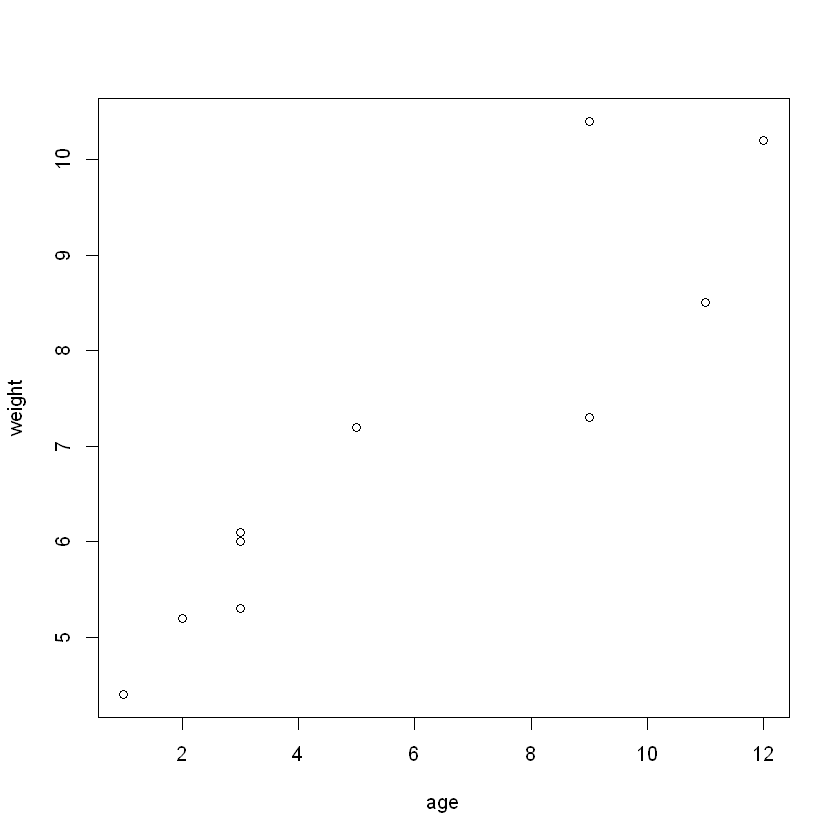

In [4]:
plot(age,weight)

# 数据结构

## 向量

In [7]:
a <- c(1,2,5,3,6,-2,4)  #数值型向量
b <- c("one","two","three")    #字符型向量 
c <- c(TRUE,TRUE,TRUE,FALSE,TRUE,TRUE)     #逻辑型向量

In [8]:
a[c(2,4)]

[1] 2 3

In [9]:
a[3]

[1] 5

In [10]:
a[c(1,3,5)]

[1] 1 5 6

In [11]:
a[2:6]

[1]  2  5  3  6 -2

## 矩阵

```
myymatrix <- matrix(vector,nrow = number_or_rows,ncol = number_of_columns,
                   byrow = logical_value,dimnames = list(char_vector_rownames,char_vector_colnames))

其中vector包含了矩阵的元素，nrow和ncol用以指定行和列的维数，dimnames包含了可选的、
以字符型向量表示的行名和列名。选项byrow则表明矩阵应当按行填充（byrow=TRUE）还是按
列填充（byrow=FALSE），默认情况下按列填充。
```

### 创建一个5*4的矩阵

In [12]:
y <- matrix(1:20,nrow = 5,ncol = 4)
y

1,6,11,16
2,7,12,17
3,8,13,18
4,9,14,19
5,10,15,20


### 按行填充的2*2矩阵

In [13]:
cells <- c(1,26,24,68)
rnames <- c("R1","R2")
cnames <- c("C1","C2")
mymatrix <- matrix(cells, nrow = 2, ncol = 2,
                  byrow = TRUE, dimnames = list(rnames,cnames))
mymatrix

,C1,C2
R1,1,26
R2,24,68


### 按列填充的2*2矩阵

In [14]:
mymatrix <- matrix(cells,nrow =2, ncol = 2,
                  byrow = FALSE,dimnames = list(rnames,cnames))
mymatrix

,C1,C2
R1,1,24
R2,26,68


### 矩阵下标的使用

In [15]:
x <- matrix(1:10,nrow = 2)
x

1,3,5,7,9
2,4,6,8,10


In [16]:
x[,2]

[1] 3 4

In [17]:
x[2,]

[1]  2  4  6  8 10

In [18]:
x[1,4]

[1] 7

In [19]:
x[1,c(4,5)]

[1] 7 9

## 数组

```
myarray <- array(vector,dimensions,dimnames)
其中vector包含了数组中的数据， dimensions是一个数值型向量，给出了各个维度下标的最大
值，而dimnames是可选的、各维度名称标签的列表。
```

### 创建一个数组

In [20]:
dim1 <- c("A1","A2")
dim2 <- c("B1","B2","B3")
dim3 <- c("C1","C2","C3","C4")
z <- array(1:24, c(2,3,4),dimnames = list(dim1,dim2,dim3))
z

, , C1

   B1 B2 B3
A1  1  3  5
A2  2  4  6

, , C2

   B1 B2 B3
A1  7  9 11
A2  8 10 12

, , C3

   B1 B2 B3
A1 13 15 17
A2 14 16 18

, , C4

   B1 B2 B3
A1 19 21 23
A2 20 22 24

In [21]:
z[1,2,3]

[1] 15

## 数据框

### 创建数据框

```
mydata <- data.frame(col1,col2,col3,...)
其中的列向量col1, col2, col3,… 可为任何类型（如字符型、数值型或逻辑型）。每一列的
名称可由函数names指定。
```

In [22]:
patientID <- c(1,2,3,4)
age <- c(25,34,28,52)
diabetes <- c("Type1","Type2","Type1","Type1")
status <- c("Poor","Improved","Excellent","Poor")
patientdata <- data.frame(patientID, age,diabetes,status)
patientdata

patientID,age,diabetes,status
1,25,Type1,Poor
2,34,Type2,Improved
3,28,Type1,Excellent
4,52,Type1,Poor


In [23]:
patientdata[1:2]

patientID,age
1,25
2,34
3,28
4,52


In [25]:
patientdata[c("diabetes","status")]

diabetes,status
Type1,Poor
Type2,Improved
Type1,Excellent
Type1,Poor


In [26]:
patientdata$age

[1] 25 34 28 52

In [27]:
table(patientdata$diabetes,patientdata$status)

       
        Excellent Improved Poor
  Type1         1        0    2
  Type2         0        1    0

### attach()

```
函数attach()可将数据框添加到R的搜索路径中。 R在遇到一个变量名以后，将检查搜索路径中的数据框，以定位到这个变量。
函数detach()将数据框从搜索路径中移除。值得注意的是， detach()并不会对数据框本身做任何处理。
这句是可以省略的，但其实它应当被例行地放入代码中，因为这是一个好的编程习惯。
```

In [28]:
summary(mtcars$mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

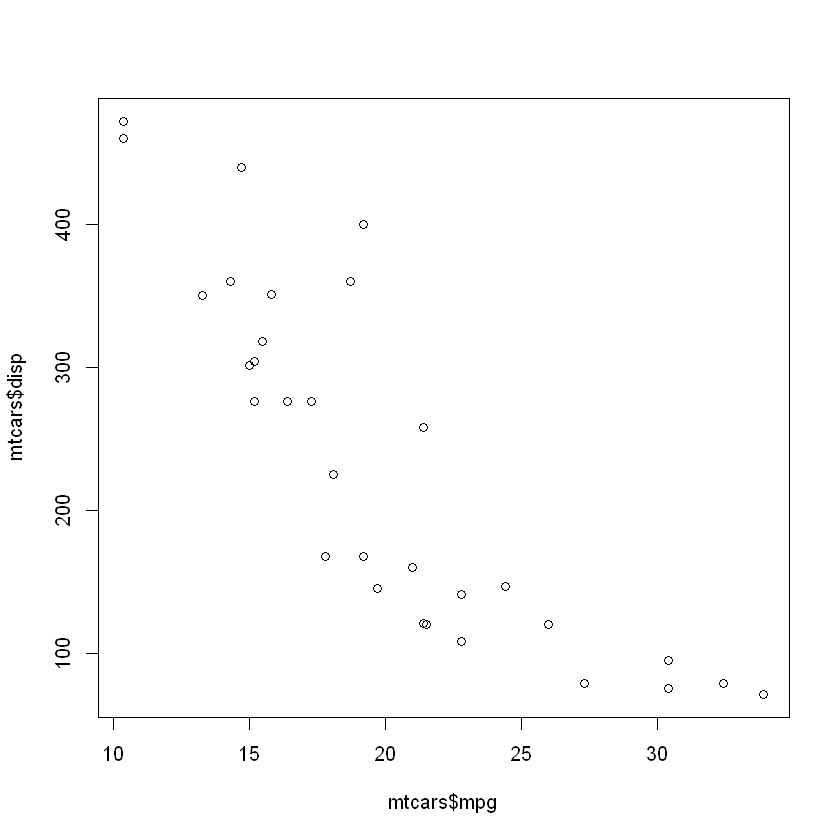

In [29]:
plot(mtcars$mpg,mtcars$disp)

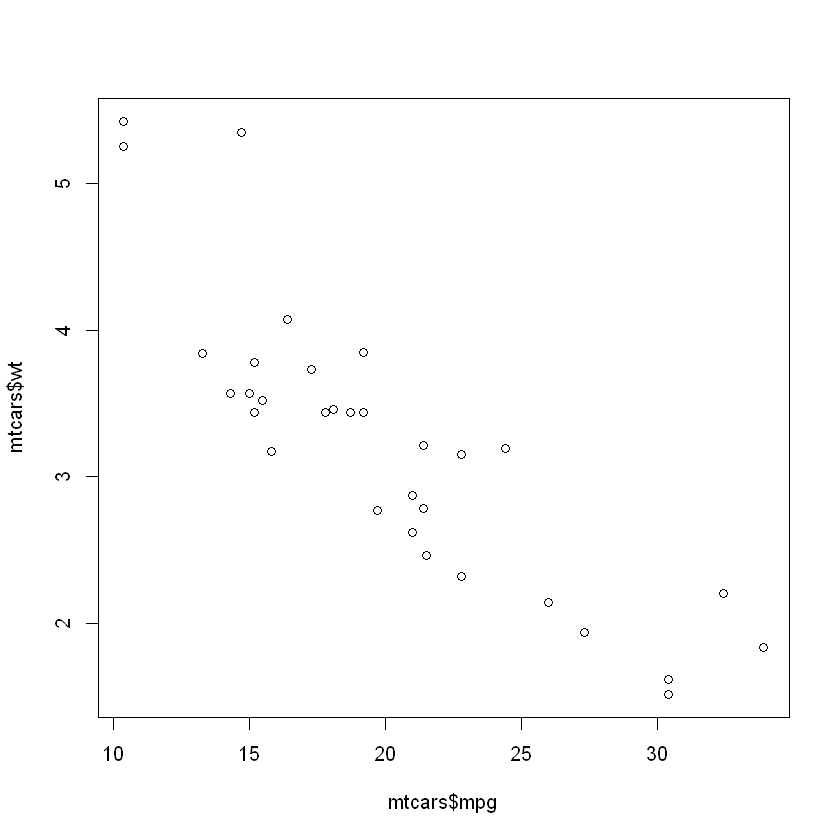

In [30]:
plot(mtcars$mpg,mtcars$wt)

In [31]:
attach(mtcars)
summary(mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

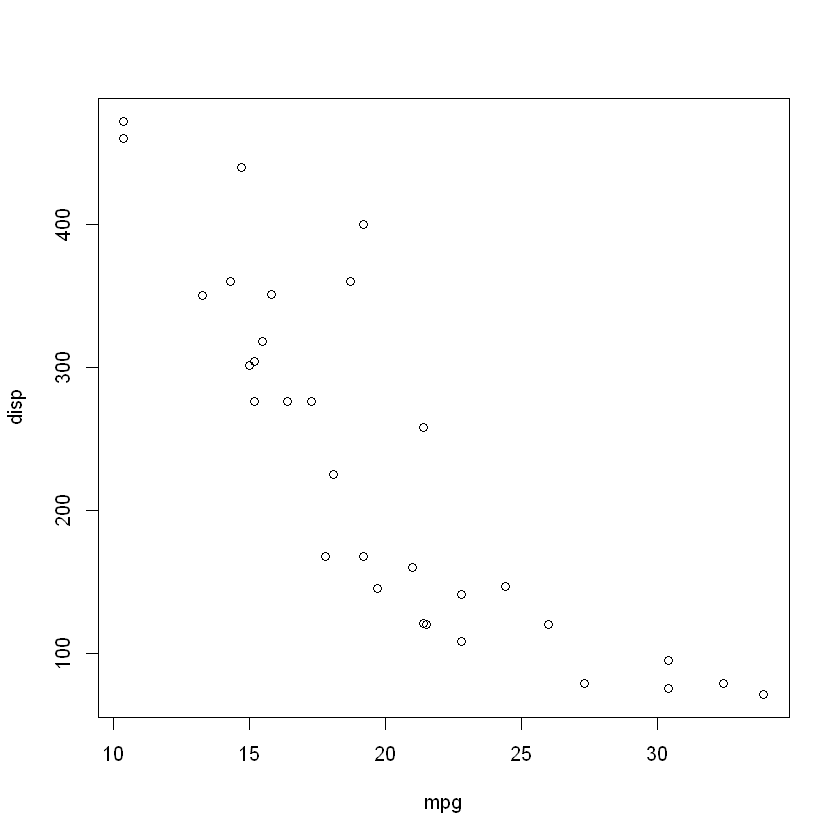

In [32]:
plot(mpg,disp)

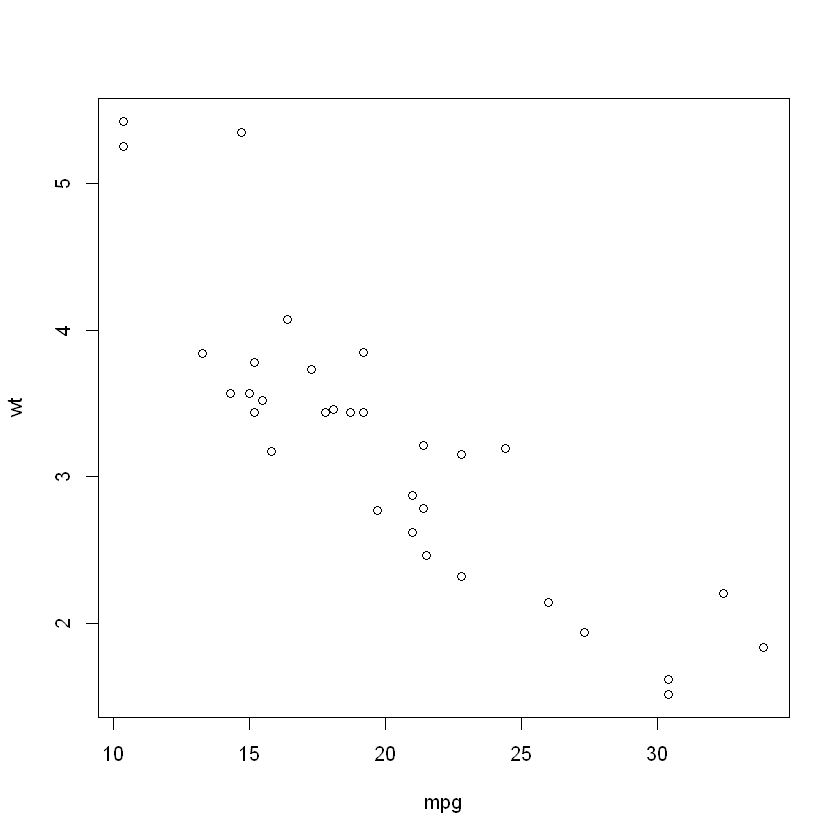

In [33]:
plot(mpg,wt)

In [34]:
detach(mtcars)

### with()

```
在这种情况下，大括号{}之间的语句都针对数据框mtcars执行，这样就无须担心名称冲突
了。如果仅有一条语句（例如summary(mpg)），那么大括号{}可以省略。
函数with()的局限性在于，赋值仅在此函数的括号内生效。
```

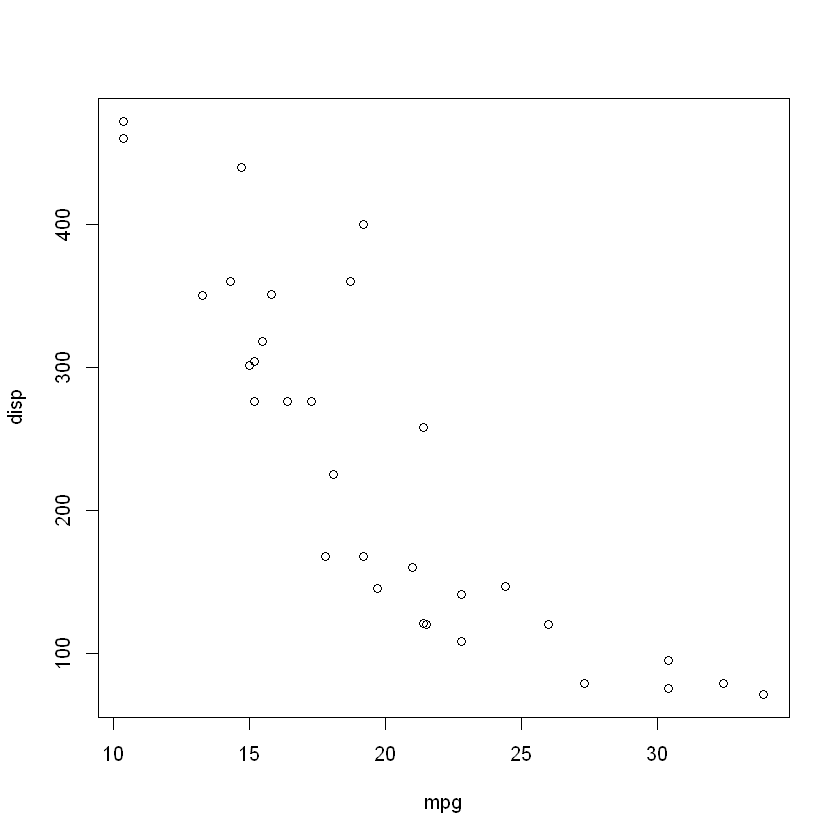

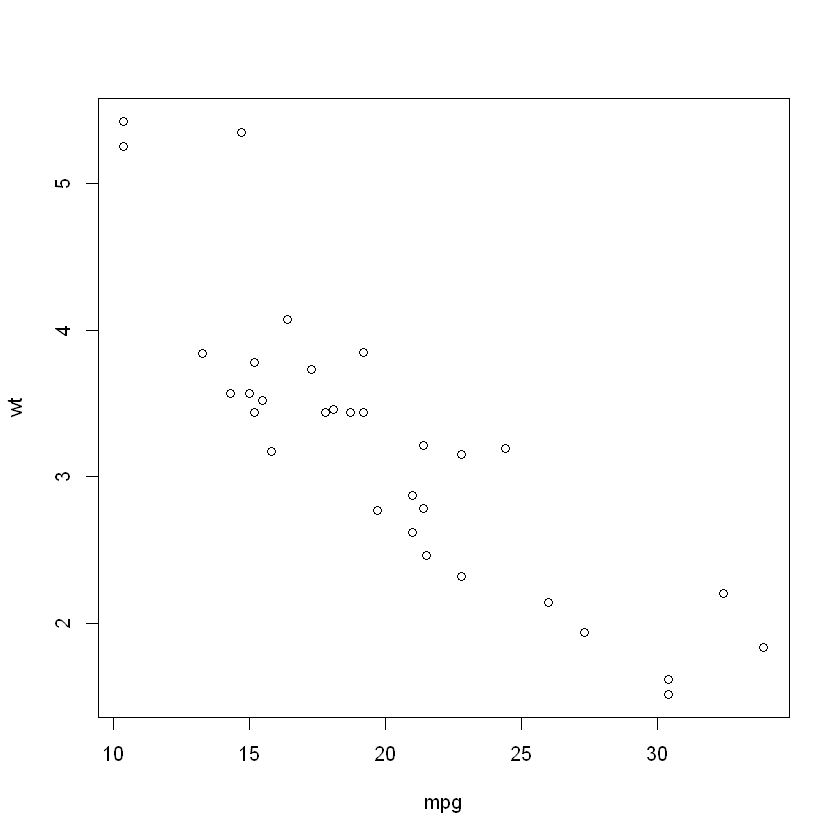

In [37]:
with(mtcars,{
    summary(mpg,disp,wt)
    plot(mpg,disp)
    plot(mpg,wt)
})

### 因子的使用

In [38]:
patientID <- c(1,2,3,4)
age <- c(25,34,28,52)
diabets <- c("Type1","Type2","Type1","Type1")
status <- c("Poor","Improved","Excellent","Poor")
diabetes <- factor(diabetes)
status <- factor(status, order = TRUE)
patientdata <- data.frame(patientID, age, diabetes,status)
str(patientdata)

'data.frame':	4 obs. of  4 variables:
 $ patientID: num  1 2 3 4
 $ age      : num  25 34 28 52
 $ diabetes : Factor w/ 2 levels "Type1","Type2": 1 2 1 1
 $ status   : Ord.factor w/ 3 levels "Excellent"<"Improved"<..: 3 2 1 3


In [39]:
summary(patientdata)

   patientID         age         diabetes       status 
 Min.   :1.00   Min.   :25.00   Type1:3   Excellent:1  
 1st Qu.:1.75   1st Qu.:27.25   Type2:1   Improved :1  
 Median :2.50   Median :31.00             Poor     :2  
 Mean   :2.50   Mean   :34.75                          
 3rd Qu.:3.25   3rd Qu.:38.50                          
 Max.   :4.00   Max.   :52.00                          

## 列表

### 创建列表

```
mylist <- list(name1 = object1, name2 = object2 ,)
其中的对象可以是目前为止讲到的任何结构。你还可以为列表中的对象命名：
```

In [40]:
g <- "My First List"
h <- c(25,26,18,39)
j <- matrix(1:10, nrow = 5)
k <- c("one","two","three")
mylist <- list(title = g,ages = h,j, k)
mylist

$title
[1] "My First List"

$ages
[1] 25 26 18 39

[[3]]
     [,1] [,2]
[1,]    1    6
[2,]    2    7
[3,]    3    8
[4,]    4    9
[5,]    5   10

[[4]]
[1] "one"   "two"   "three"


In [41]:
mylist[[2]]

[1] 25 26 18 39

In [42]:
mylist[["ages"]]

[1] 25 26 18 39

# 数据的输入

## 从键盘输入

In [ ]:
mydata <- data.frame(age = numeric(0),gender = character(0),weight = numeric(0))
mydata <- edit(mydata)      #目前jupyter不支持，但在RStudio里面支持

## 从带分隔符的文本文件导入数据

```
read.table(file, header = logical_value, sep = "delimiter",row.names = "name")
其中， file是一个带分隔符的ASCII文本文件， header是一个表明首行是否包含了变量名的逻
辑值（TRUE或FALSE）， sep用来指定分隔数据的分隔符， row.names是一个可选参数，用以指
定一个或多个表示行标识符的变量
```

In [45]:
macro <- read.table("macrodata.csv", header = TRUE, sep = ",")
head(macro)

year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55


## (error)从excel导入数据

## 导入XML数据

对使用R存取XML文档感兴趣的读者可以参阅www.omegahat.org/RSXML，从中可以找到若干份优秀的软件包文档。

## 从网页抓取数据

Programming with R（www.programmingr.com）上找到的“Webscraping using readLines and RCurl”一文

## （支持有限）导入HDF5数据

# 数据集的标注

## 变量标签（更改列名）

In [50]:
patientdata

patientID,age,diabetes,status
1,25,Type1,Poor
2,34,Type2,Improved
3,28,Type1,Excellent
4,52,Type1,Poor


In [51]:
names(patientdata)[2] <- "admissionAge"

In [52]:
patientdata

patientID,admissionAge,diabetes,status
1,25,Type1,Poor
2,34,Type2,Improved
3,28,Type1,Excellent
4,52,Type1,Poor


## (error)值标签

In [ ]:
patientdata$gender <- factor(patientdata$gender,
                             levels = c(1,2),
                             labels = c("male", "female"))

# 图形初阶

## 使用图形

In [61]:
pdf("mygragh.pdf") #win.metafile()、png()、jpeg()、bmp()、tiff()、xfig()和postscript()
attach(mtcars)
plot(wt,mpg)
abline(lm(mpg~wt))   #最优拟合曲线
title("Regression of MPG on Weight")
detach(mtcars)
dev.off()

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



png 
  2

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



png 
  3

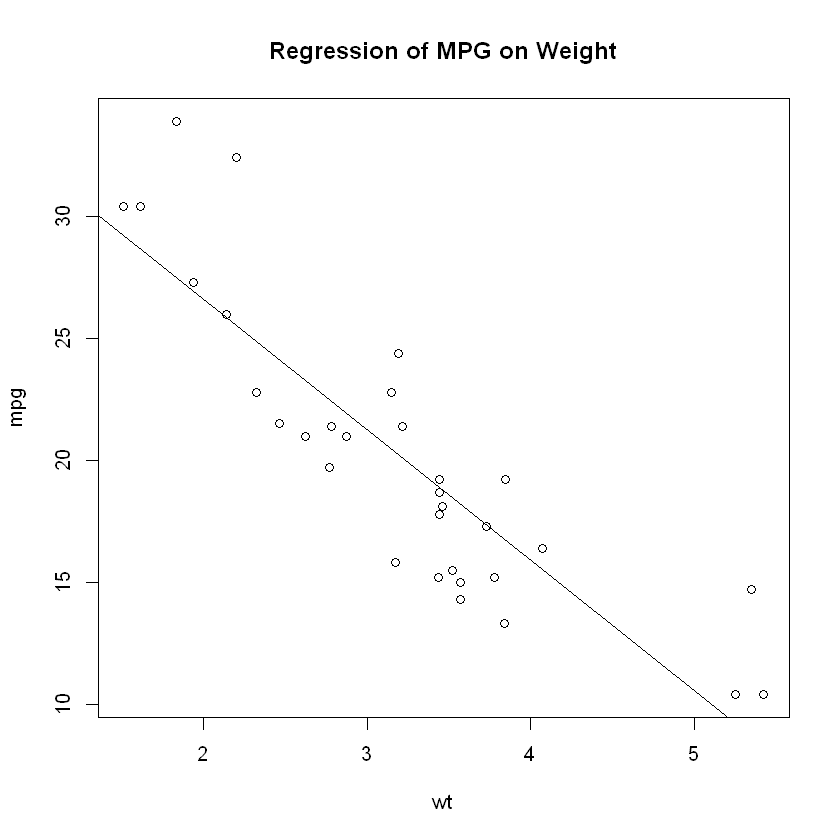

In [64]:
attach(mtcars)
plot(wt,mpg)
abline(lm(mpg~wt))   #最优拟合曲线
title("Regression of MPG on Weight")
detach(mtcars)
dev.off()

## 病人对两种药物五个剂量水平上的响应情况

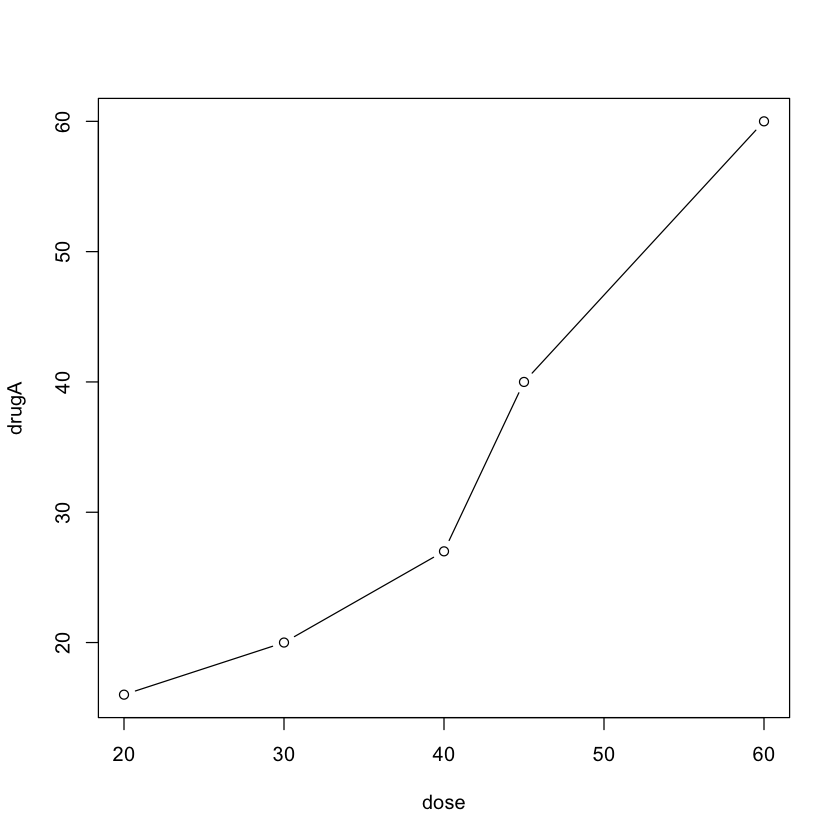

In [1]:
dose <- c(20,30,40,45,60)
drugA <- c(16,20,27,40,60)
drugB <- c(15,18,25,31,40)
plot(dose, drugA, type = "b")  #both，同时绘制点和线

## 图形参数

par(optionname=value, optionname=value,...)添加参数no.readonly=TRUE可以生成一个可以修改的当前图形参数列表。

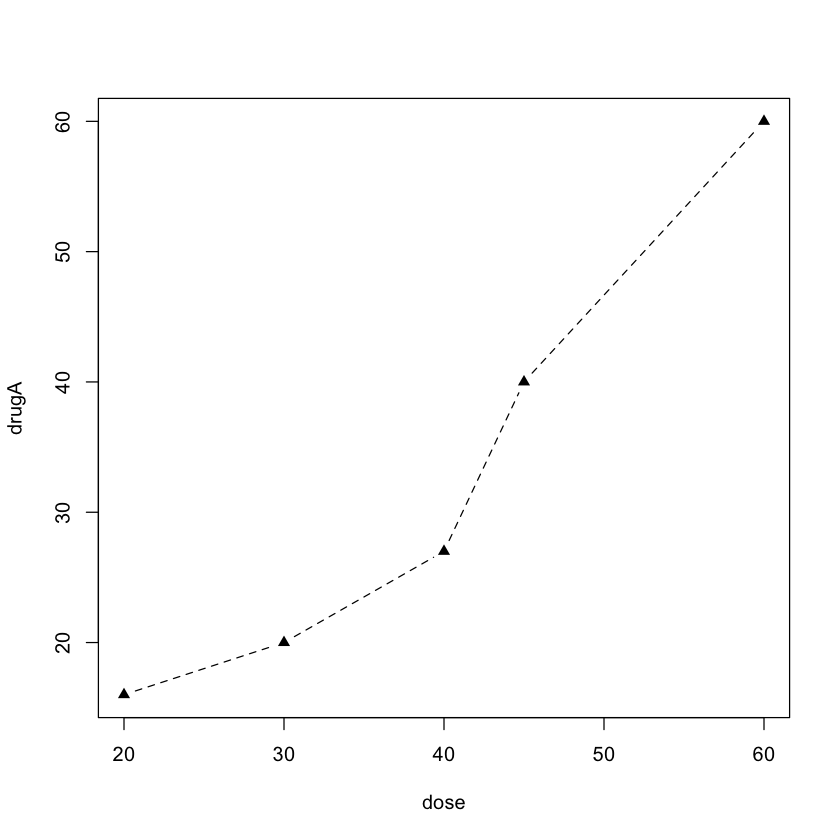

In [3]:
opar <- par(no.readonly = TRUE)
par(lty=2, pch=17)     #虚线 & 实心三角
plot(dose,drugA,type="b")
par(opar)

Warning message in plot.window(...):
“"lyt"不是图形参数”Warning message in plot.xy(xy, type, ...):
“"lyt"不是图形参数”Warning message in axis(side = side, at = at, labels = labels, ...):
“"lyt"不是图形参数”Warning message in axis(side = side, at = at, labels = labels, ...):
“"lyt"不是图形参数”Warning message in box(...):
“"lyt"不是图形参数”Warning message in title(...):
“"lyt"不是图形参数”

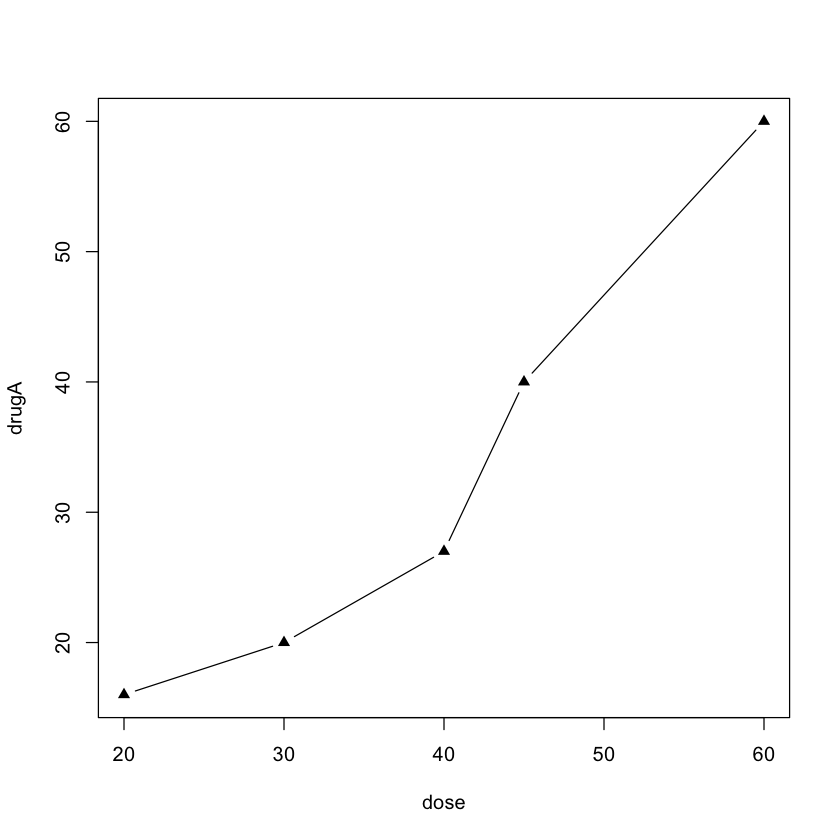

In [4]:
plot(dose,drugA,type = "b",lyt = 2, pch = 17)

## 符号和线条

书p45  3.3.1节

lty线条类型,lwd线条宽度,pch点符号,cex符号大小,col边界颜色,bg填充色

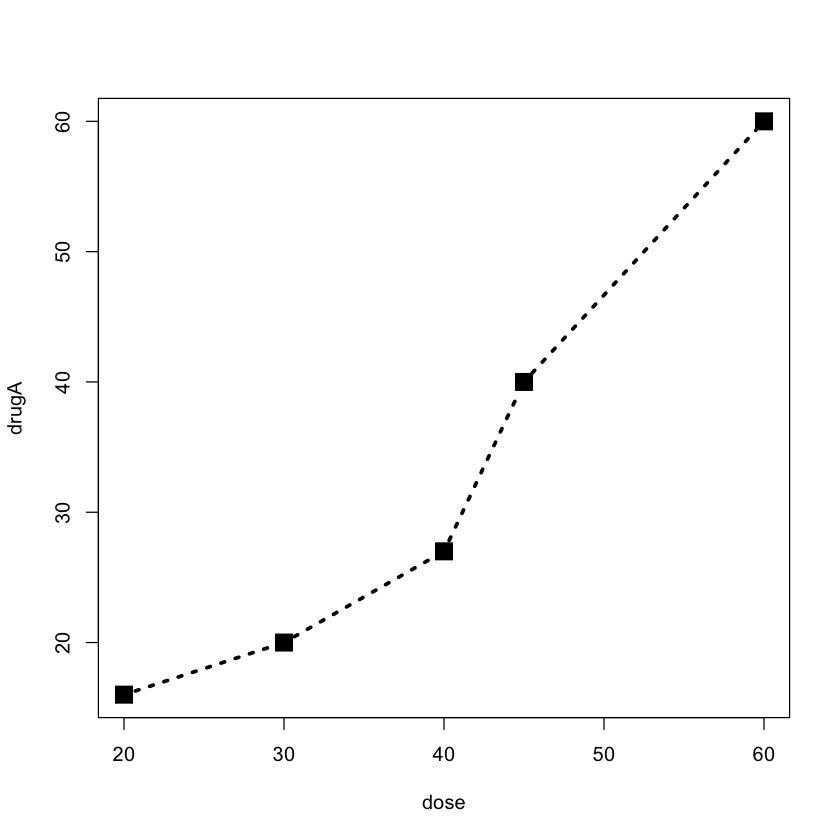

In [5]:
plot(dose,drugA,type="b",lty=3,lwd=3,pch=15,cex=2)

## 颜色

```
col：默认绘图颜色
col.axis：坐标轴刻度文字的颜色
col.lab ： 坐标轴标签的颜色
col.main：标题颜色
col.sub ： 副标题颜色
fg：图形的前景色
bg：图形的背景色
```

```
在R中，可以通过颜色下标、颜色名称、十六进制的颜色值、RGB值或HSV值来指定颜色。 举例来说，col=1、col="white"、col="#FFFFFF"、col=rgb(1,1,1)和col=hsv(0,0,1) 都是表示白色的等价方式。函数rgb()可基于红—绿—蓝三色值生成颜色，而hsv()则基于色相— 饱和度—亮度值来生成颜色。请参考这些函数的帮助以了解更多细节。 7
函数colors()可以返回所有可用颜色的名称。Earl F. Glynn为R中的色彩创建了一个优秀的 在线图表，参见http://research.stowers-institute.org/efg/R/Color/Chart。R中也有多种用于创建连续 型颜色向量的函数，包括rainbow()、heat.colors()、terrain.colors()、topo.colors() 以及cm.colors()。举例来说，rainbow(10)可以生成10种连续的“彩虹型”颜色。多阶灰度 色可使用gray()函数生成。这时要通过一个元素值为0和1之间的向量来指定各颜色的灰度。 gray(0:10/10)将生成10阶灰度色。
```

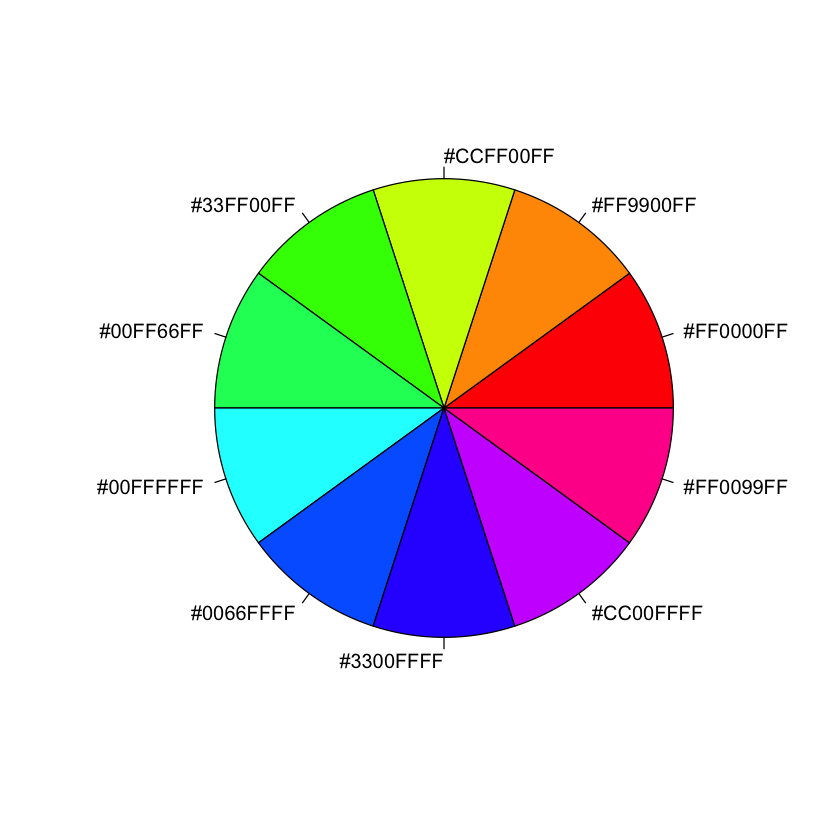

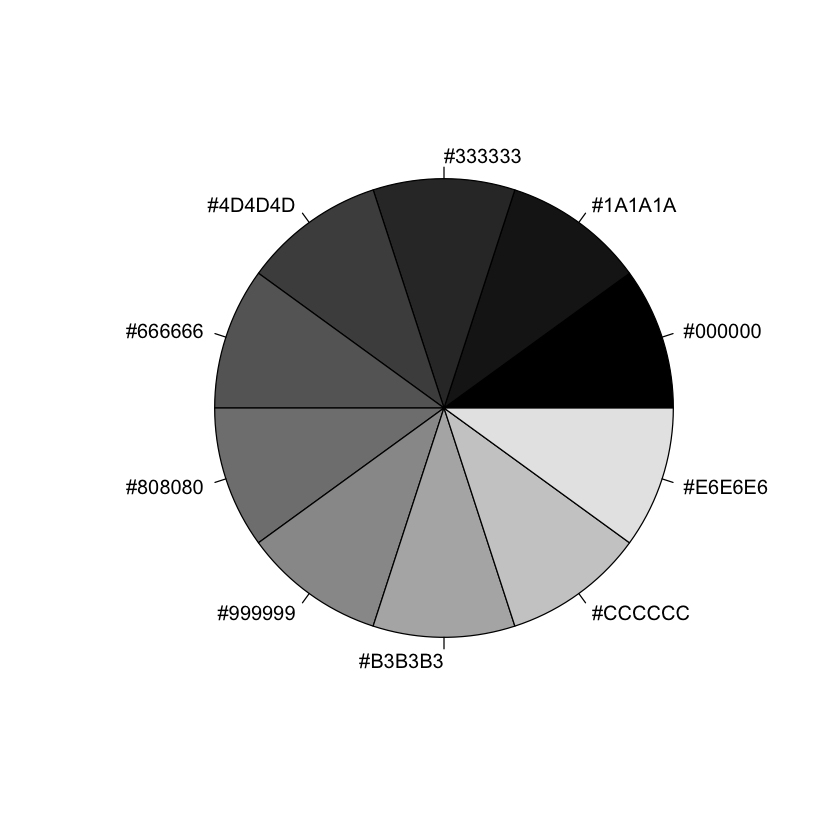

In [6]:
n <- 10
mycolors <- rainbow(n)
pie(rep(1,n),labels=mycolors, col=mycolors)
mygrays <- gray(0:n/n)
pie(rep(1,n),labels=mygrays, col=mygrays)

## 文本属性

par(font.lab=3, cex.lab=1.5, font.main=4, cex.main=2)

## 图形尺寸与便捷

p49 3.3.4节

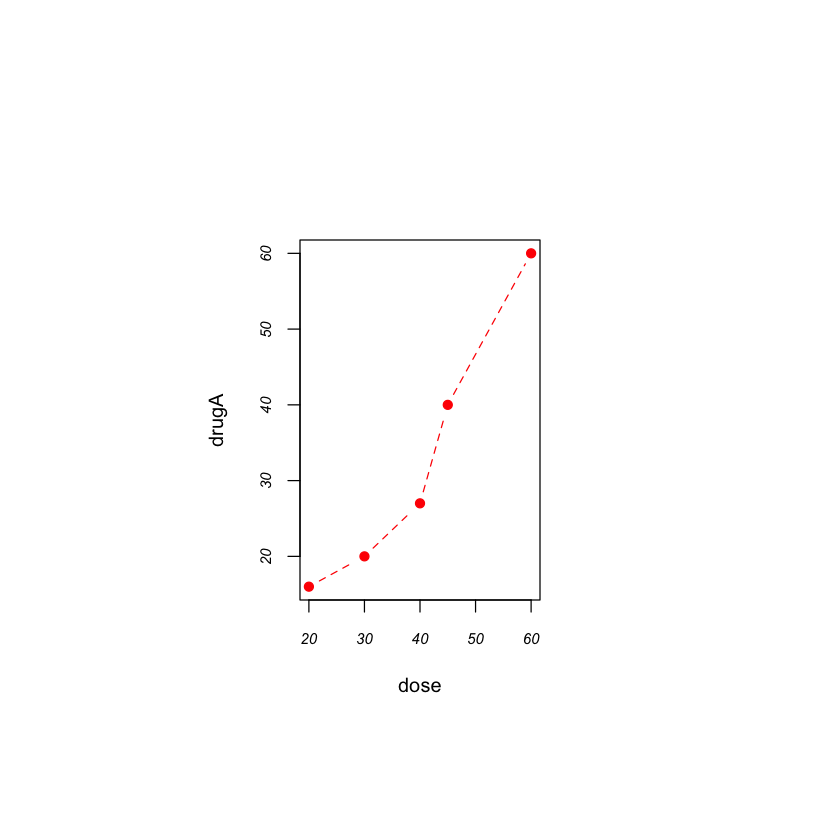

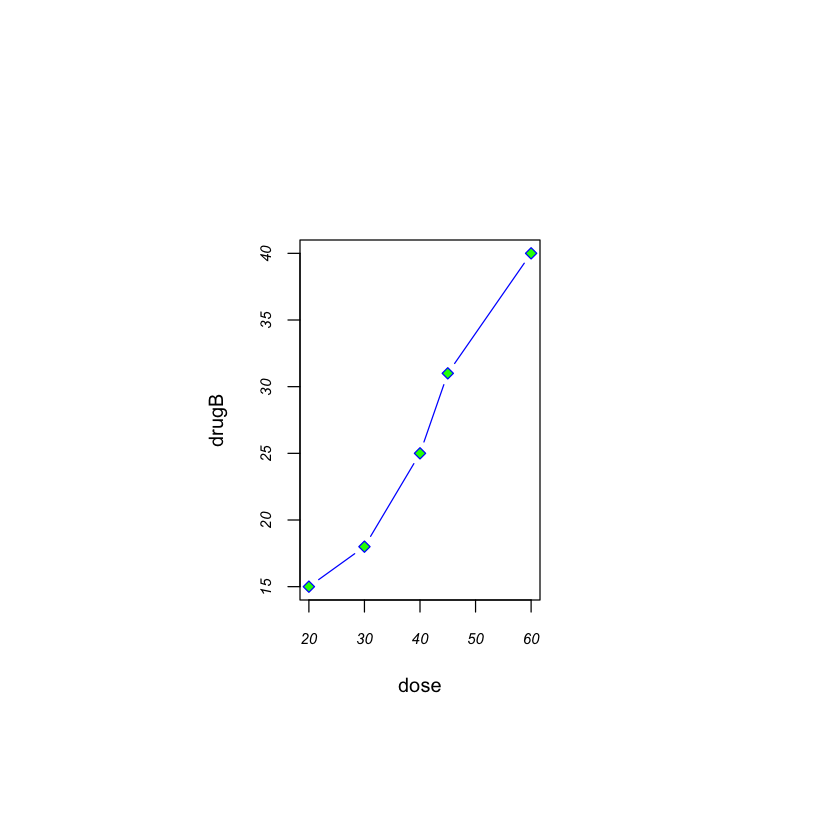

In [7]:
dose <- c(20,30,40,45,60)
drugA <- c(16,20,27,40,60)
drugB <- c(15,18,25,31,40)
opar <- par(no.readonly=TRUE)
par(pin=c(2,3))
par(cex.axis=.75,font.axis=3)
plot(dose,drugA,type="b",pch=19,lty=2,col="red")
plot(dose,drugB,type="b",pch=23,col="blue",bg="green")
par(opar)

## 添加文本、自定义坐标轴和图例

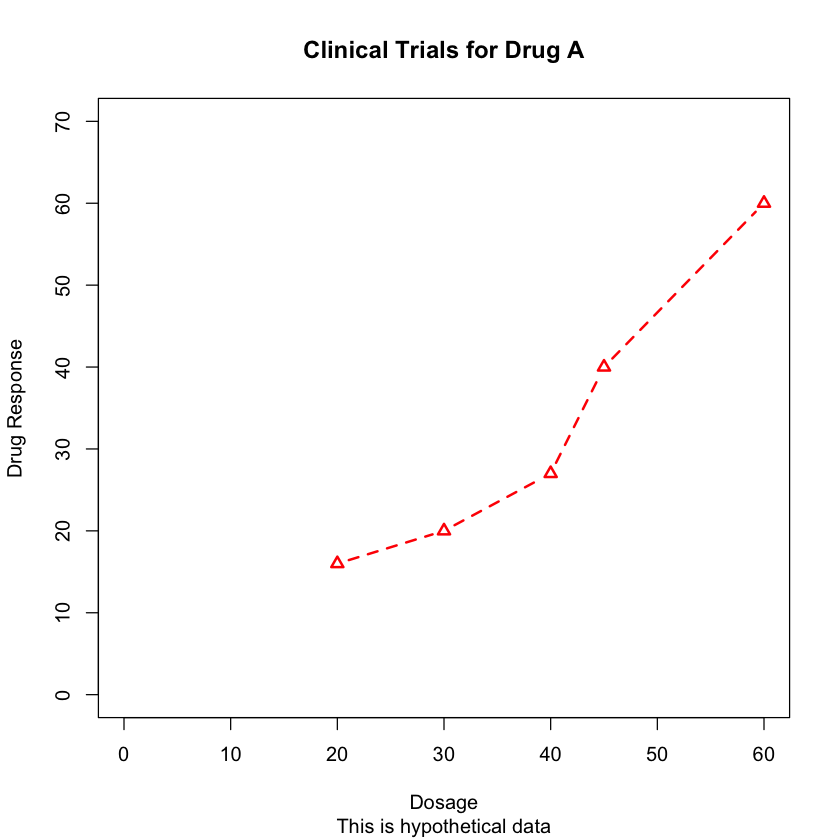

In [8]:
plot(dose, drugA, type="b",
    col="red", lty=2, pch=2,
    lwd=2, main="Clinical Trials for Drug A",
    sub="This is hypothetical data",
    xlab="Dosage",ylab="Drug Response",
    xlim=c(0,60),ylim=c(0,70))

## 标题

```
title(main="My Title",col.main="red",
     sub="My Sub-title", col.sub="blue",
     xlab="My X label", ylab="My Y label",
     col.lab="green", cex.lab=0.75)
```

## 坐标轴

axis(side, at=, labels=, pos=, lty=, col=, las=, tck=, 

创建自定义坐标轴时，你应当禁用高级绘图函数自动生成的坐标轴。参数axes=FALSE将禁 用全部坐标轴(包括坐标轴框架线，除非你添加了参数frame.plot=TRUE)。参数xaxt="n"和 yaxt="n"将分别禁用X轴或Y轴(会留下框架线，只是去除了刻度)。

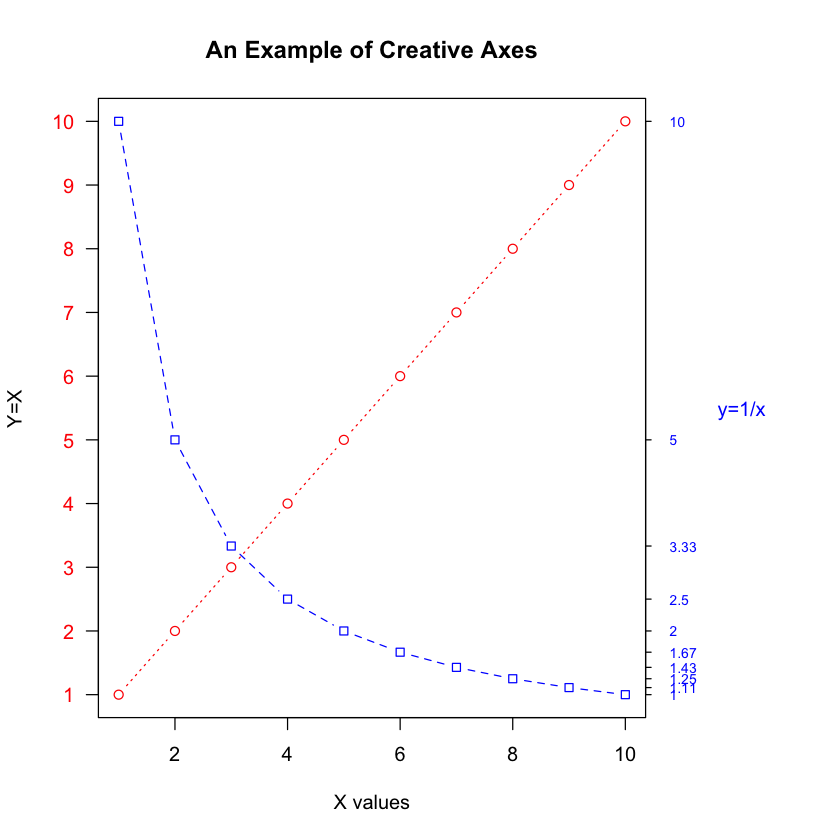

In [10]:
x <- c(1:10)
y <- x
z <- 10/x

opar <- par(no.readonly=TRUE)
par(mar=c(5,4,4,8)+0.1)
plot(x,y,type="b",
    pch=21,col="red",
    yaxt="n",lty=3,ann=FALSE)

lines(x,z,type="b",pch=22,col="blue",lty=2)

axis(2,at=x,labels=x,col.axis="red",las=2)

axis(4,at=z,labels=round(z,digits=2),col.axis="blue",
    las=2,cex.axis=0.7,tck=-.01)

mtext("y=1/x",side=4,line=3,cex.lab=1,las=2,col="blue")

title("An Example of Creative Axes",
     xlab="X values",
     ylab="Y=X")

par(opar)

```
次要刻度线minor.tick()函数
library(Hmisc)
minor.tick(nx=n, ny=n, tick.ratio=n)
```

## 参考线